##  Veille régression logistique 

La régression logistique est une méthode utilisée pour **prédire une réponse binaire**, c’est-à-dire une variable qui ne peut prendre que deux valeurs (par exemple : malade ou non, 0 ou 1, oui ou non).

Elle permet de **modéliser la probabilité qu’un événement se produise** en fonction de différentes caractéristiques (âge, poids, tension, etc.).

C’est un outil très utilisé en médecine pour estimer des **risques de maladies** ou de complications à partir de données patients. Elle est simple, rapide à entraîner, et offre des résultats souvent faciles à interpréter.

Dans notre cas, elle sert à prédire si un patient présente un **risque cardio-vasculaire** ou non.


## Explication des données 

- AGE : age in number of days (integer)
- HEIGHT : height in cm (integer)
- WEIGHT : weight in kg (integer)
- GENDER : gender, categorical (1: female, 2: male)
- AP_HIGH : systolic blood pressure (integer)
- AP_LOW : diastolic blood pressure (integer)
- CHOLESTEROL : cholesterol level, categorical (1: normal, 2: above normal, 3: well above normal)
- GLUCOSE : glucose level, categorical (1: normal, 2: above normal, 3: well above normal) 
- SMOKE : if patient smokes or not, categorical (0: no, 1: yes)
- ALCOHOL : if patient drinks alcohol or not, categorical (0: no, 1: yes)
- PHYSICAL_ACTIVITY : if patient is active or not, categorical (0: no, 1: yes)
 
### -and target variable

- CARDIO_DISEASE : if patient got the disease or not, categorical (0: no, 1: yes)

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("cardio_train.csv")
print(df.shape)
df.head()


(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Prétraitement des données

In [5]:
df = df.drop_duplicates()
print("Dimensions des donées:", df.shape)


Dimensions des donées: (70000, 13)


In [6]:

df_clean = df.copy()


initial_rows = df_clean.shape[0]

df_clean = df_clean[(df_clean["height"] >= 140) & (df_clean["height"] <= 200)]
df_clean = df_clean[(df_clean["weight"] >= 40) & (df_clean["weight"] <= 150)]


final_rows = df_clean.shape[0]


print("Dimensions après nettoyage :", df_clean.shape)
print("Le nettoyage a enlevé", initial_rows - final_rows, "lignes du jeu de données.")



Dimensions après nettoyage : (69751, 13)
Le nettoyage a enlevé 249 lignes du jeu de données.


In [7]:
df_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000,69751.00000,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000
mean,49972.600063,19469.000846,1.349744,164.466445,74.165091,128.830483,96.59506,1.367092,1.226420,0.088228,0.053791,0.803730,0.499749
std,28853.128864,2466.455579,0.476892,7.803498,14.109042,154.279663,188.57303,0.680455,0.572226,0.283628,0.225607,0.397178,0.500004
min,0.000000,10798.000000,1.000000,140.000000,40.000000,-150.000000,-70.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25011.000000,17665.500000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74885.500000,21325.500000,2.000000,170.000000,82.000000,140.000000,90.00000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,200.000000,150.000000,16020.000000,11000.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Visualitation des données

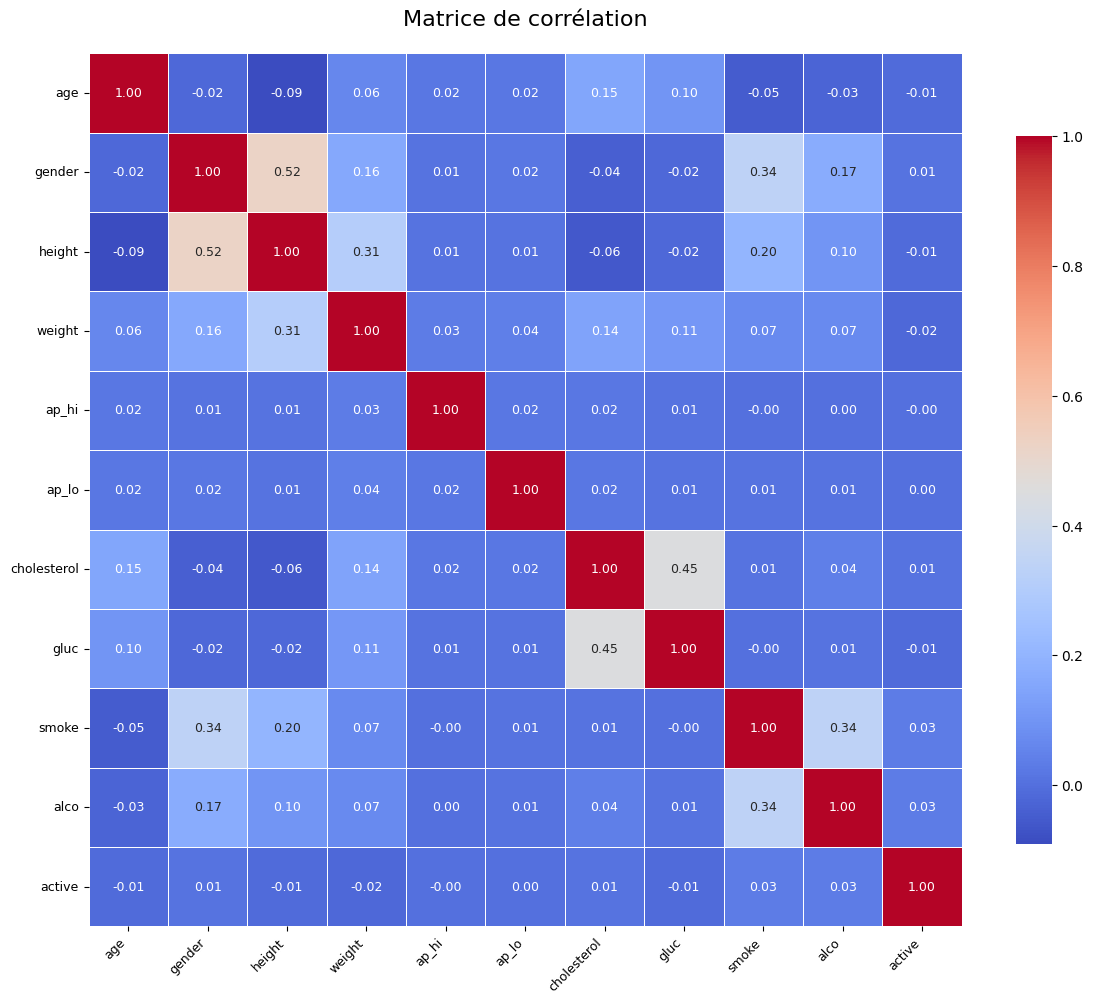

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

ordered_columns = [
    "age", "gender", "height", "weight", 
    "ap_hi", "ap_lo", "cholesterol", "gluc", 
    "smoke", "alco", "active"
]

corr_matrix = df_clean[ordered_columns].corr().round(2)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


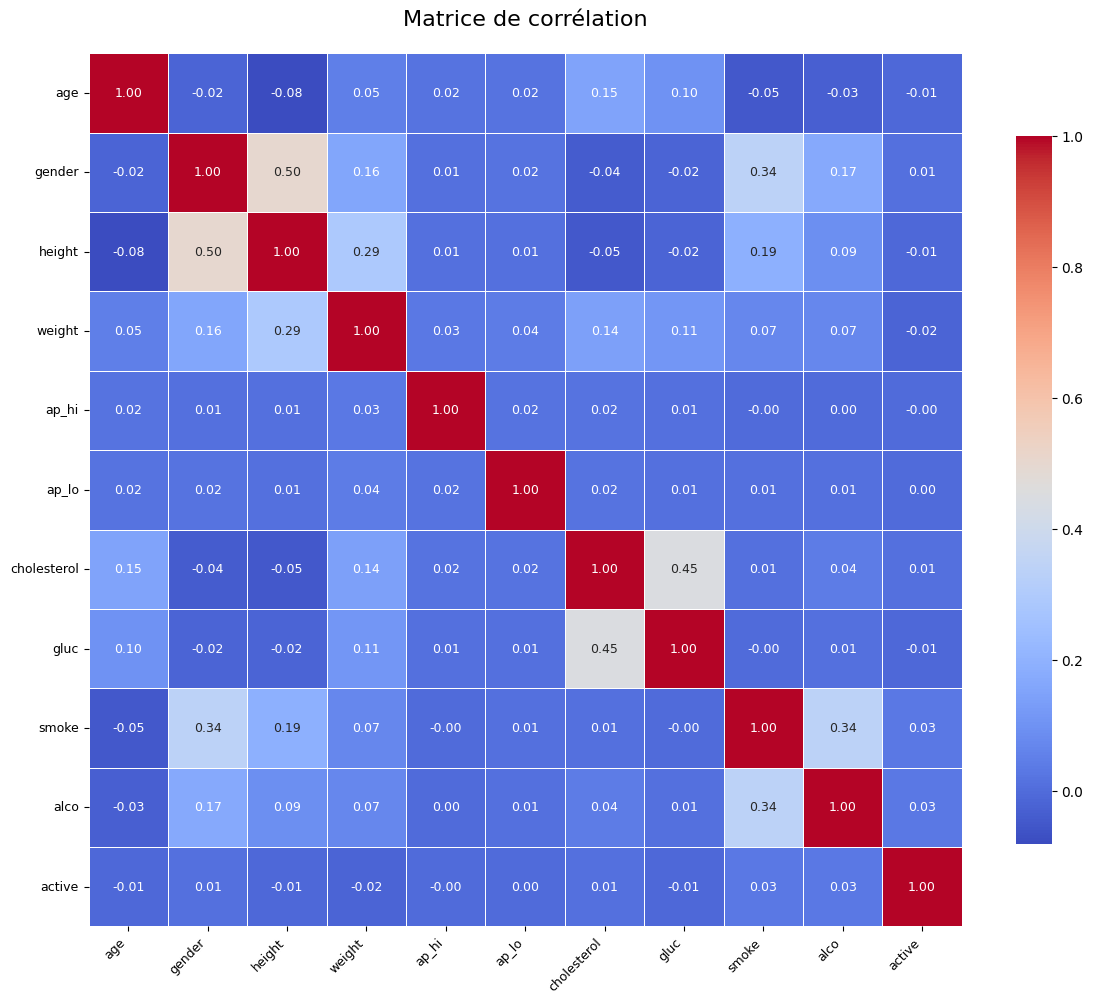

In [9]:
ordered_columns = [
    "age", "gender", "height", "weight", 
    "ap_hi", "ap_lo", "cholesterol", "gluc", 
    "smoke", "alco", "active"
]

corr_matrix = df[ordered_columns].corr().round(2)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

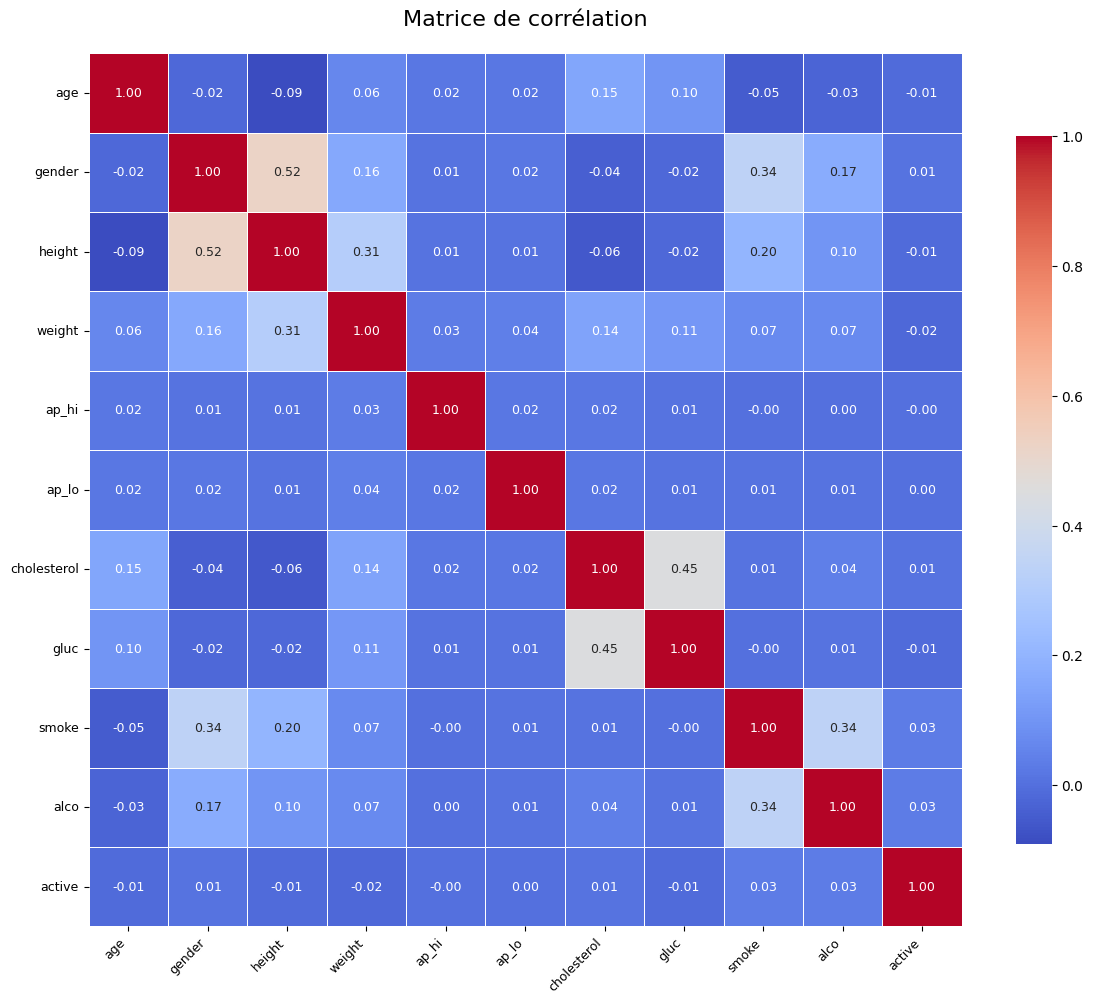

In [12]:
ordered_columns = [
    "age", "gender", "height", "weight", 
    "ap_hi", "ap_lo", "cholesterol", "gluc", 
    "smoke", "alco", "active"
]

corr_matrix = df_standardized[ordered_columns].corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

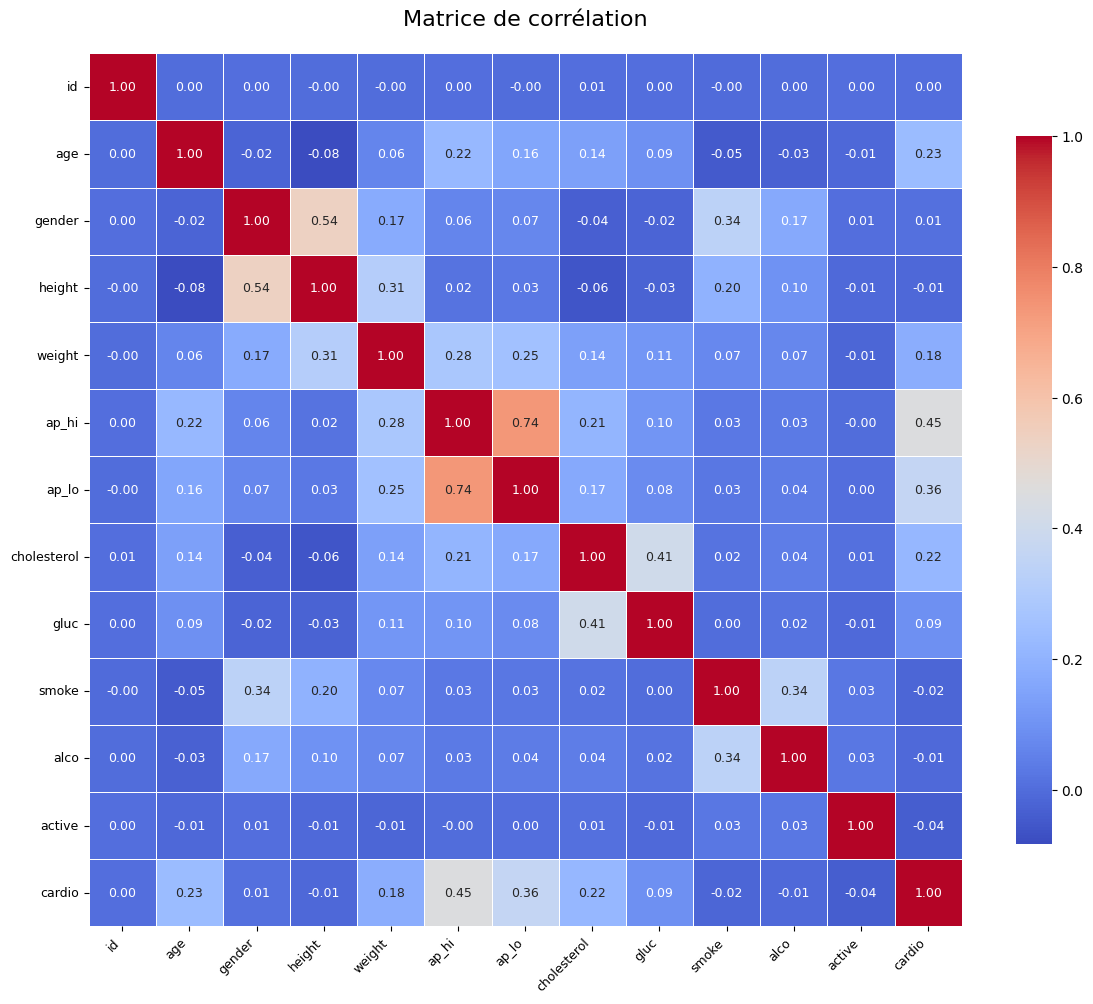

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_clean.corr(method='spearman')

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()
